# Calories Burnt Prediction using Machine Learning with Python

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [68]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [69]:
calories.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [70]:
#here we are concatenating the data with the help of unique user id and then deleting the user id as it is not needed further
calories_df = pd.concat([exercise.drop('User_ID',axis=1),calories['Calories']],axis=1)
calories_df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [71]:
calories_df.shape

(15000, 8)

In [72]:
calories_df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# EDA

In [73]:
calories_df.head(5)

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


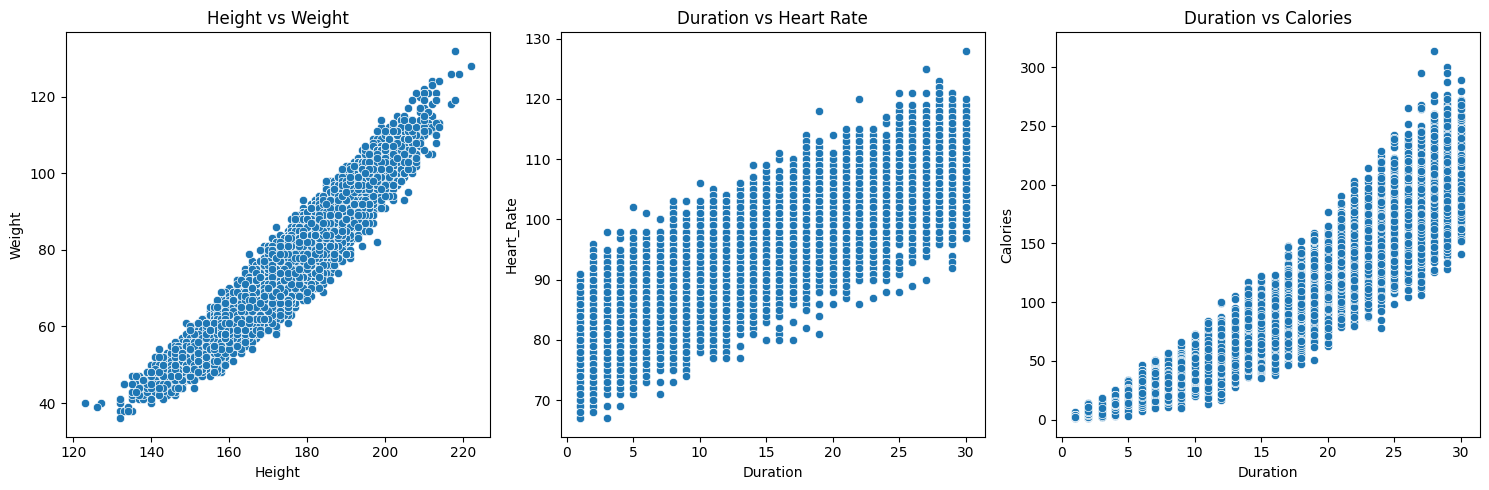

In [92]:
# Set up the figure with two subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

# Plot scatterplot in the first column
sns.scatterplot(x=calories_df['Height'], y=calories_df['Weight'], ax=ax1)
ax1.set_title('Height vs Weight')

# Plot scatterplot in the second column
sns.scatterplot(x=calories_df['Duration'], y=calories_df['Heart_Rate'], ax=ax2)
ax2.set_title('Duration vs Heart Rate')

# Plot scatterplot in the third column
sns.scatterplot(x=calories_df['Duration'], y=calories_df['Calories'], ax=ax3)
ax3.set_title('Duration vs Calories')

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plots
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

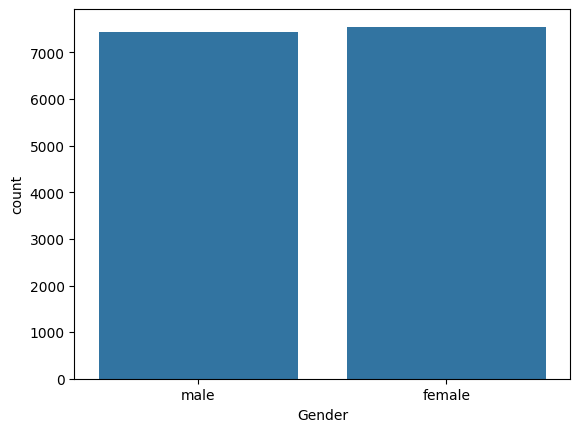

In [75]:
sns.countplot(x=calories_df['Gender'])

In [76]:
calories_df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

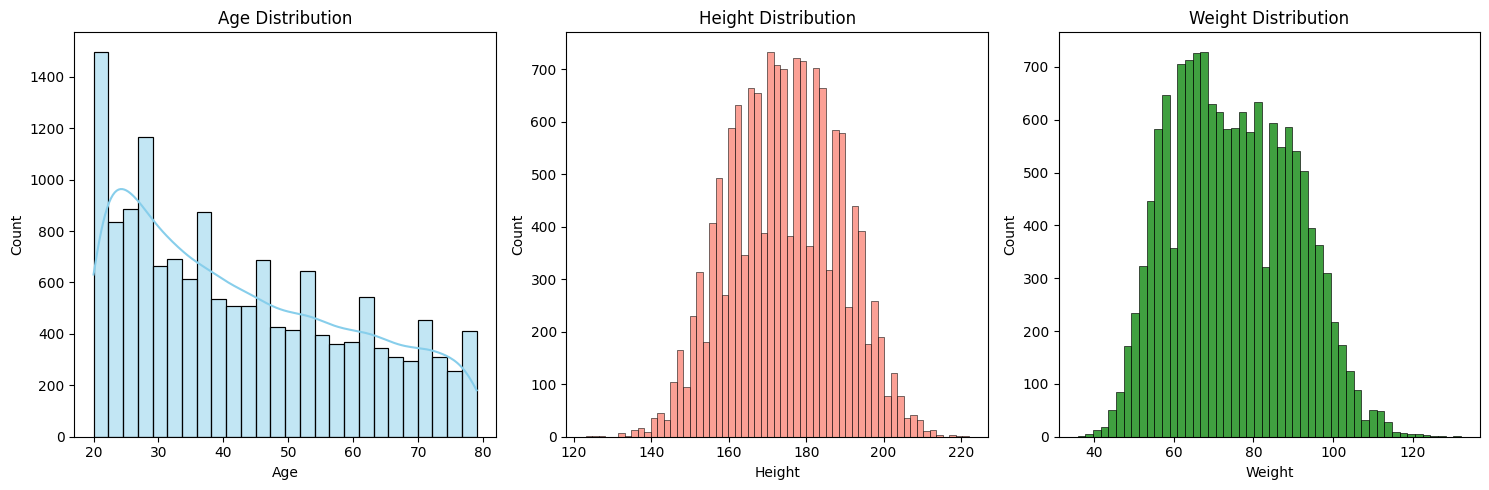

In [77]:
# Set up the figure with three subplots in one row
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

# Plot the first histogram with KDE
sns.histplot(data=calories_df, x='Age', kde=True, ax=ax1, color='skyblue')
ax1.set_title('Age Distribution')

# Plot the second histogram
sns.histplot(x=calories_df['Height'], ax=ax2, color='salmon')
ax2.set_title('Height Distribution')

# Plot the third histogram
sns.histplot(x=calories_df['Weight'], ax=ax3, color='green')
ax3.set_title('Weight Distribution')

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plots
plt.show()

In [78]:
# Select numeric columns as gender is a string data type, so take selective columns only
numeric_columns = calories_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation
correlation = calories_df[numeric_columns].corr()

correlation

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


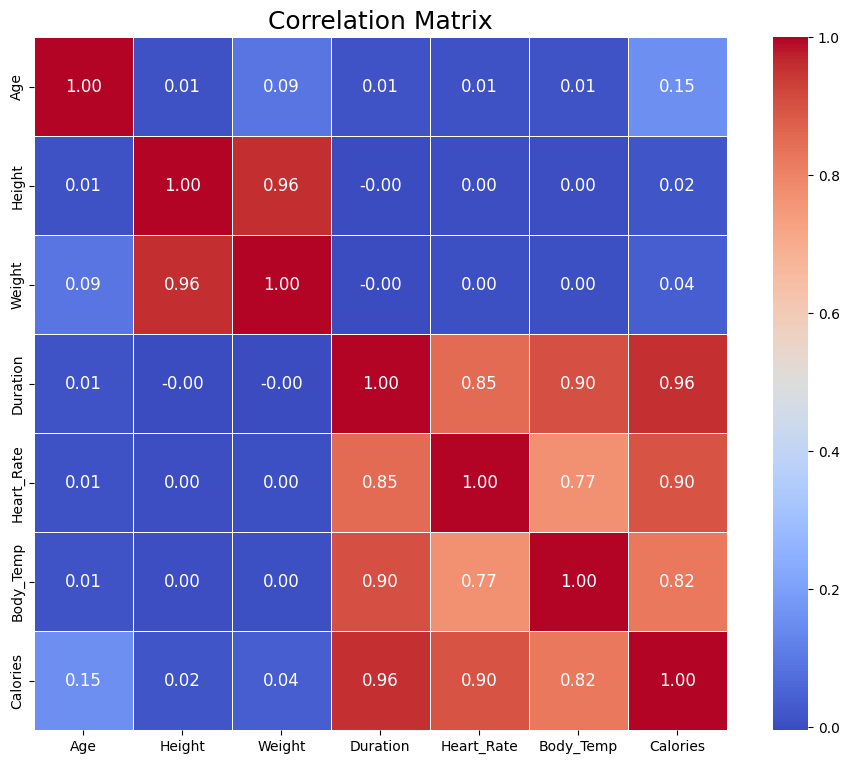

In [79]:
# Plot heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation, cbar=True, square=True, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={'size': 12}, linewidths=0.5)

# Add title
plt.title('Correlation Matrix', fontsize=18)

# Show plot
plt.show()

In [80]:
# Map gender categories to numeric values
gender_map = {'male': 0, 'female': 1}
calories_df['Gender'] = calories_df['Gender'].map(gender_map)

# Splitting trainnig and testing

In [81]:
X= calories_df.drop('Calories',axis=1)
y = calories_df['Calories']

In [82]:
X.shape

(15000, 7)

In [83]:
y.shape

(15000,)

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Training Models

In [93]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [89]:
models = {
    'lr':LinearRegression(),
    "rfr":RandomForestRegressor(),
    'dtr':DecisionTreeRegressor(),
    'xg':XGBRFRegressor()
}

for name, mod in models.items():
    mod.fit(X_train,y_train)
    ypred = mod.predict(X_test)
    print(f"{name}  MSE: {mean_squared_error(y_test,ypred)} r2 score: {r2_score(y_test,ypred)}")
    

lr  mse: 130.08707386188377 r2 score: 0.9668790377181355
rfr  mse: 7.200500133333333 r2 score: 0.9981667087570907
dtr  mse: 28.622666666666667 r2 score: 0.9927124945244017
xg  mse: 58.36412892124307 r2 score: 0.9851401368696574


# Selecting Random Forest Regressor model as its MSE is minimum

In [94]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [95]:
X_train


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
1154,1,38,169.0,67.0,3.0,85.0,38.5
9804,0,30,194.0,96.0,9.0,91.0,39.6
7919,1,78,182.0,79.0,7.0,84.0,39.4
4854,0,50,171.0,77.0,29.0,111.0,40.8
5947,1,32,172.0,66.0,29.0,105.0,40.8
...,...,...,...,...,...,...,...
11798,1,49,178.0,71.0,12.0,98.0,39.9
13896,1,67,159.0,58.0,23.0,101.0,40.4
6637,1,25,167.0,64.0,20.0,100.0,40.4
2575,1,36,167.0,64.0,28.0,108.0,40.8


# Predictive System

In [96]:
def pred(Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp):
    features = np.array([[Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp]])
    prediction = model.predict(features).reshape(1,-1)
    return prediction[0]

### Lets take an example

In [102]:
Gender = 1
Age = 36
Height = 167.0
Weight = 64.0
Duration = 28.0
Heart_Rate = 108.0
Body_Temp = 40.0


result = pred(Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp)
print("You consumed this much calories:", result[0])

You consumed this much calories: 180.58


C:\Users\chama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [103]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [104]:
X_train.to_csv('X_train.csv')

In [105]:
pd.read_csv("X_train.csv")

,Unnamed: 0,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1154,1,38,169.0,67.0,3.0,85.0,38.5
1,9804,0,30,194.0,96.0,9.0,91.0,39.6
2,7919,1,78,182.0,79.0,7.0,84.0,39.4
3,4854,0,50,171.0,77.0,29.0,111.0,40.8
4,5947,1,32,172.0,66.0,29.0,105.0,40.8
...,...,...,...,...,...,...,...,...
11995,11798,1,49,178.0,71.0,12.0,98.0,39.9
11996,13896,1,67,159.0,58.0,23.0,101.0,40.4
11997,6637,1,25,167.0,64.0,20.0,100.0,40.4
11998,2575,1,36,167.0,64.0,28.0,108.0,40.8
